In [1]:
from scripts.D4PG_agent import MAD4PG_Net

from scripts.data_handling import Logger, Saver, gather_args
cmd_args = "--num_episodes 1200 --actor_learn_rate 0.00025 --critic_learn_rate 0.0005 --C 2500 --vmin 0 --vmax 1.3"
args = gather_args(cmd_args.split())


In [2]:
from scripts.environment import Environment

env = Environment(args)
env_info = env.reset()

LOADING ON SYSTEM: Linux
##################################################
#                                                #


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


#                                                #
##################################################


In [3]:
action_size = env.action_size
state_size = env.state_size
num_agents =env.agent_count

In [4]:
from collections import deque
import numpy as np

agent = MAD4PG_Net(env, args, state_size, action_size, num_agents)

n_episodes = 6000
max_t = 1000
scores = []
scores_deque = deque(maxlen=100)
scores_avg = []

agent.initialize_memory(args.pretrain, env)

for i_episode in range(1, n_episodes+1):
    rewards_list = []
    env.reset()                                           # reset the environment    
    state = env.states                  # get the current state (for each agent)
    # loop over steps
    for t in range(max_t):
        # select an action
        actions = agent.act(state)
        # take action in environment and set parameters to new values
        next_state, rewards, done = env.step(actions)
        agent.store((state, next_state, actions, rewards, done))
        
        # update and train agent with returned information
        agent.learn()
        state = next_state
        rewards_list.append(rewards)
        if any(done):
            break

    # calculate episode reward as maximum of individually collected rewards of agents
    episode_reward = np.max(np.sum(rewards_list,axis=0))
        
    scores.append(episode_reward)             # save most recent score to overall score array
    scores_deque.append(episode_reward)       # save most recent score to running window of 100 last scores
    current_avg_score = np.mean(scores_deque)
    scores_avg.append(current_avg_score)      # save average of last 100 scores to average score array
    
    print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, current_avg_score),end="")
    
    # log average score every 200 episodes
    if i_episode % 200 == 0:
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, current_avg_score))
        agent.save_agents(folder='saved_weights', name='d4pg')

    # break and report success if environment is solved
    if np.mean(scores_deque)>=.5:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)))
        agent.save_agents(folder='saved_weights', name='d4pg')
        break

Initializing memory buffer.
...memory filled: 1/128
...memory filled: 11/128
...memory filled: 21/128
...memory filled: 31/128
...memory filled: 41/128
...memory filled: 51/128
...memory filled: 61/128
...memory filled: 71/128
...memory filled: 81/128
...memory filled: 91/128
...memory filled: 101/128
...memory filled: 111/128
...memory filled: 121/128
...memory filled: 128/128
Done!
Episode 200	Average Score: 0.098
Episode 400	Average Score: 0.076
Episode 477	Average Score: 0.593
Environment solved in 477 episodes!	Average Score: 0.593


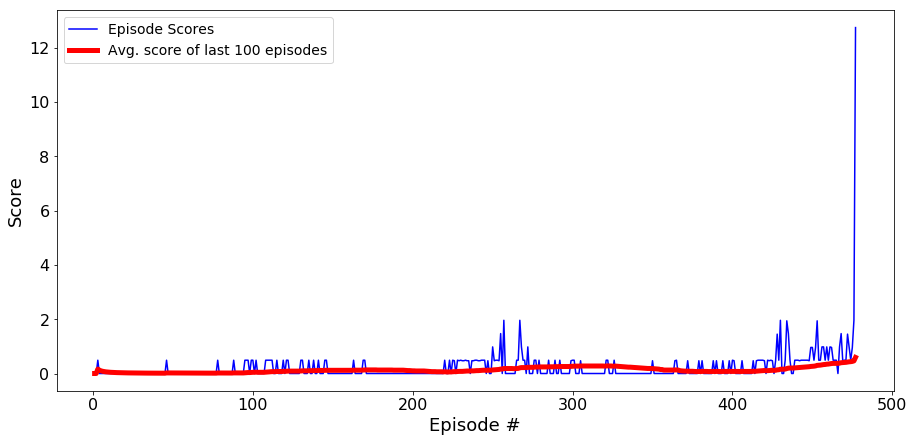

In [9]:
import matplotlib.pyplot as plt
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores,'b',label='Episode Scores')
plt.plot(np.arange(1, len(scores)+1), scores_avg,'r',\
         linewidth=5,label='Avg. score of last 100 episodes')
plt.ylabel('Score', fontsize=18)
plt.xlabel('Episode #', fontsize=18)
ax.legend(fontsize=14)
plt.savefig('MA4DPG_learning_curve.png')